In [13]:
import pandas as pd
from pandas import Series,DataFrame
from sklearn.utils import shuffle
import os
cwd = os.getcwd()
print(cwd)
os.chdir('C:\\Users\\G560667\\Desktop\\')
print(cwd)

C:\Users\G560667\Desktop
C:\Users\G560667\Desktop


In [14]:
print(cwd)

C:\Users\G560667\Desktop


In [5]:
# numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from pandas import ExcelWriter
from pandas import ExcelFile
df = pd.read_excel('Sheet 8.xlsx', sheetname='Sheet1')
 
print("Column headings:")
print(df.columns)

Column headings:
Index(['Description Base 2'], dtype='object')


In [ ]:
with open(C:\\Users\\G560667\\Desktop\\72HVC\\,'rb') as f:
contents = f.read()
contents = contents.rstrip("\n").decode("utf-16")   
contents = contents.split("\r\n")

In [16]:
df.head()

,Description Base 2
0,YOP PLENTI OTML GRK YGRT VANILLA ADULT GREEK Y...
1,YOP PLENTI OTML GRK YGRT STRAWBERRY ADULT GREE...
2,YOP PLENTI OTML GRK YGRT PEACH ADULT GREEK YOG...
3,YOP PLENTI OTML GRK YGRT MAPLE BRWN SGR ADULT ...
4,YOP PLENTI OTML GRK YGRT BLUEBERRY ADULT GREEK...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [18]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Description Base 2'])

In [88]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

Top terms per cluster:


In [29]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 yoplait
 orig
 original
 multipack
 core
 8cup
 pack
 special
 csrp
 6oz
Cluster 1:
 greek
 100
 yoplait
 yogurt
 grk
 150g
 5oz
 whips
 ff
 adult
Cluster 2:
 gurt
 gogurt
 64g
 2oz
 16ct
 kid
 8ct
 lf
 24ct
 simply
Cluster 3:
 yoplait
 orig
 6oz
 170g
 single
 core
 serve
 1cup
 original
 lf
Cluster 4:
 whips
 113g
 yoplait
 4oz
 core
 serve
 single
 1cup
 lf
 adult
Cluster 5:
 size
 large
 high
 mountain
 32oz
 1tub
 yghrt
 mh
 oz
 907g
Cluster 6:
 plenti
 greek
 grk
 150g
 seeds
 gs
 grain
 otml
 oatmeal
 5oz
Cluster 7:
 lt
 light
 yoplait
 ff
 170g
 6oz
 core
 adult
 yop
 ygrt
Cluster 8:
 liberte
 organic
 lib
 mediterranee
 yogurt
 org
 156g
 med
 whl
 mlk
Cluster 9:
 kid
 cup
 113g
 annies
 yogurt
 4oz
 multipack
 equity
 4ct
 4cup


In [32]:
print("\n")
print("Prediction")

Y = vectorizer.transform(["Adult Yogurt strawberry"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["150gm Adult Yogurt sberry"])
prediction = model.predict(Y)
print(prediction)



Prediction
[3]
[3]


In [33]:
from __future__ import print_function

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np

In [34]:
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

In [35]:
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int",
              help="Preprocess documents with latent semantic analysis.")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=True,
              help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=True,
              help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="Use a hashing feature vectorizer")
op.add_option("--n-features", type=int, default=10000,
              help="Maximum number of features (dimensions)"
                   " to extract from text.")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="Print progress reports inside k-means algorithm.")

op.print_help()

Usage: __main__.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.


In [53]:
use_hashing = True
use_idf = True 
n_components = 100
minibatch = False
n_features = 10000
verbose = False

In [116]:
print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()

if  use_hashing:
    if use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=1000,
                                   stop_words='english', non_negative=True,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=1000,
                                       stop_words='english',
                                       non_negative=False, norm='l2',
                                       binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                                 min_df=2, stop_words='english',
                                 use_idf=use_idf)
X = vectorizer.fit_transform(df['Description Base 2'])

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

Extracting features from the training dataset using a sparse vectorizer
done in 0.016044s
n_samples: 428, n_features: 1000



C:\Users\G560667\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\G560667\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)




Prediction


C:\Users\G560667\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\G560667\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [ ]:
prediction = km.predict(Y)
print(prediction)

## Actual Clustering

In [104]:
if minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=verbose)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=False)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 0.054s



In [57]:
print("\n")
print("Prediction")

Y = vectorizer.fit_transform(["kid Yogurt strawberry"])



Prediction


C:\Users\G560667\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\G560667\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [58]:
prediction = km.predict(Y)
print(prediction)

[9]


In [ ]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

In [63]:
if use_hashing:
    print("Top terms per cluster:")

    if 100:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:


ValueError: shapes (10,10000) and (100,10000) not aligned: 10000 (dim 1) != 100 (dim 0)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [43]:
pca.explained_variance_ratio_

array([ 0.10947725,  0.08460972])

In [92]:
km.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 3, 4, 1, 1, 1, 2, 1, 4, 1, 3, 3, 0,
       0, 3, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2,

In [93]:
df.shape

(428, 2)

In [69]:
km.labels_.data

In [70]:
len(km.labels_)

428

In [105]:
df['label']=km.labels_

In [106]:
df.head()

,Description Base 2,label
0,YOP PLENTI OTML GRK YGRT VANILLA ADULT GREEK Y...,2
1,YOP PLENTI OTML GRK YGRT STRAWBERRY ADULT GREE...,2
2,YOP PLENTI OTML GRK YGRT PEACH ADULT GREEK YOG...,2
3,YOP PLENTI OTML GRK YGRT MAPLE BRWN SGR ADULT ...,2
4,YOP PLENTI OTML GRK YGRT BLUEBERRY ADULT GREEK...,2


In [96]:
df.tail()

,Description Base 2,label
423,YOP ORIG GIRL SCOUTS CRML COCONUT ADULT YOGURT...,1
424,YOP ORIG LF YGRT WHITE CHOCOLATELY MOCHA ADULT...,1
425,YOP ORIG LF YGRT BANANA SPLIT ADULT YOGURT YOP...,1
426,YOP WHIPS LF YGRT GIRL SCOUTS THIN MINT ADULT ...,0
427,YOP MIXINS LF YGRT SMORES 12CT ADULT YOGURT YO...,1


In [107]:
df.to_csv('results.csv')

In [108]:
df.groupby(['label']).count()

,Description Base 2
label,
0,164
1,49
2,112
3,61
4,42


In [109]:
X

<428x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 6584 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Description Base 2']
# Separating out the features
x = X#df.loc[:, features].values
# Separating out the target
y = df.loc[:,['label']].values
# Standardizing the features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [131]:
if n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(3)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    x = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()

Performing dimensionality reduction using LSA
done in 0.011043s
Explained variance of the SVD step: 18%



In [132]:
principalDf = pd.DataFrame(data = x[:,0:3]
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [136]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
import numpy as np

In [138]:
rndperm = np.random.permutation(df.shape[0])

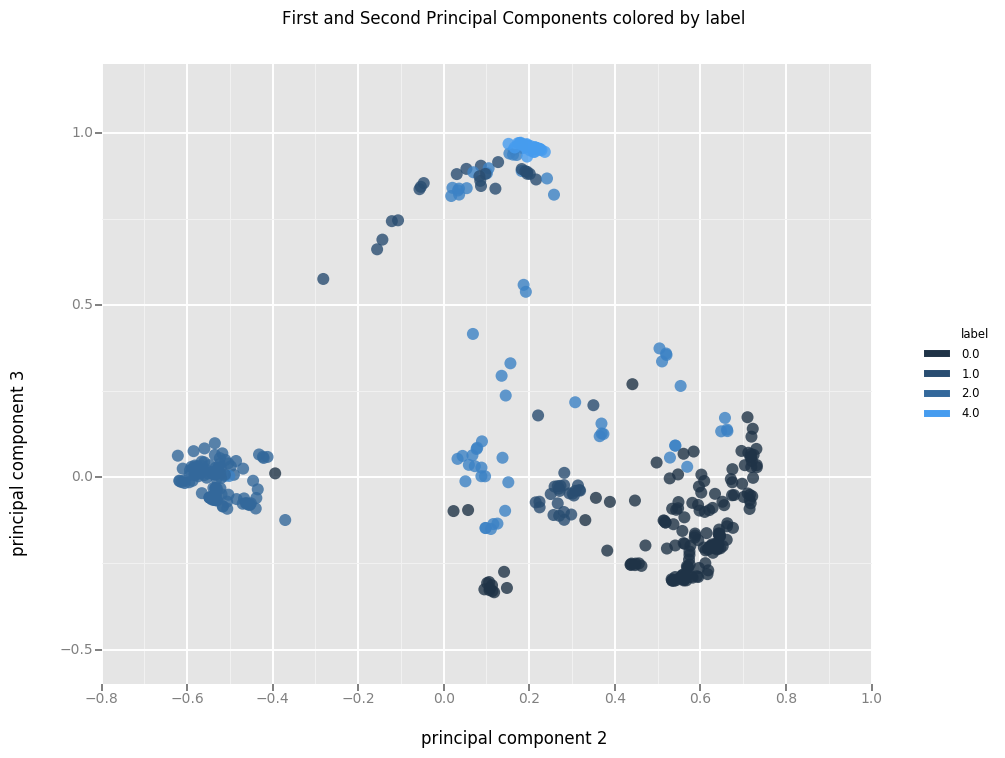

<ggplot: (-9223371853900413317)>

In [149]:
from ggplot import *

chart = ggplot(finalDf.loc[rndperm[:3000],:], aes(x='principal component 2', y='principal component 3', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by label")
chart

## Different Clustering techniques

In [151]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice